# Problem definition

## Airbnb Price Prediction with Machine Learning



**Airbnb** is a marketplace for short-term rentals that allows hosts to list part or all of their living space for others to book. The platform includes everything from private rooms to entire houses. Thanks to its flexibility and competitive prices, Airbnb has become one of the main alternatives to hotels worldwide. Since its founding in 2008, the company has grown exponentially: it went public in December 2020 with a valuation of about **\$47 billion**, and as of 2025 its market capitalization exceeds **\$85 billion**, making it more valuable than most global hotel chains.



### The Pricing Challenge

One of the biggest challenges for hosts is setting the optimal nightly price. In many cities, travelers are presented with a wide variety of listings and can filter by criteria such as:

- price  
- number of bedrooms  
- property type  
- location  

Because Airbnb is a competitive marketplace, the amount a host can charge is directly tied to supply and demand dynamics.  

- If a host sets a price much higher than the local average, guests will likely choose cheaper but similar alternatives.  
- If the price is set too low, the host loses potential revenue.  




### A Simple Strategy



A straightforward approach to pricing could be:  

1. Identify similar listings.  
2. Compute the average price among them.  
3. Use that value as a reference price.  

While simple, this strategy does not fully capture the complexity of the marketplace.




### Machine Learning for Price Prediction



The process of using existing data to predict future outcomes is called machine learning. In our case, we want to use local listing data to predict the ideal nightly rate.  

In this lesson, we will explore a **regularized linear regression model** (implemented in the [mlops repository](https://github.com/ivanovitchm/mlops)).  

This model fits a mathematical function to the available data, capturing relationships between multiple features—such as number of bedrooms, location, and property type—and estimating their impact on the final price. Unlike simple averaging strategies, regression provides a more systematic way to generalize and make robust predictions across different scenarios.  




### Next Step



Before diving deeper into the model, let’s first become familiar with the dataset we’ll be working with.


# Introduction to the data


While AirBnB does not release official data on the listings available in their marketplace, an independent initiative called [Inside AirBnB](https://insideairbnb.com/rio-de-janeiro/) has extracted and published data on a sample of listings for many major cities featured on the platform.  

In this lesson, we will work with their dataset from **March 2025**, focusing on the listings from **Rio de Janeiro, Brazil**, the world-renowned capital of Samba. Here is a [direct link to the dataset](https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz). Each row in this dataset corresponds to a specific property available for short-term rental on AirBnB in Rio de Janeiro.

To make the dataset easier to manage, we have removed many of the original 100+ columns. Below are the selected columns we will keep for our analysis:

- **host_response_rate**: the response rate of the host  
- **host_acceptance_rate**: percentage of requests to the host that convert into rentals  
- **host_listings_count**: number of other listings managed by the host  
- **latitude**: latitude of the property’s geographic coordinates  
- **longitude**: longitude of the property’s geographic coordinates  
- **city**: the city where the property is located  
- **zipcode**: the postal code of the property  
- **state**: the state where the property is located  
- **accommodates**: the number of guests the property can host  
- **room_type**: the type of accommodation (Private room, Shared room, or Entire home/apt)  
- **bedrooms**: number of bedrooms included in the rental  
- **bathrooms**: number of bathrooms available  
- **beds**: number of beds included  
- **price**: nightly rental price  
- **cleaning_fee**: additional fee charged for cleaning after the guest’s stay  
- **security_deposit**: refundable security deposit in case of damages  
- **minimum_nights**: minimum number of nights required for a booking  
- **maximum_nights**: maximum number of nights allowed for a booking  
- **number_of_reviews**: total number of reviews left by past guests  

Let’s load this dataset into Pandas and begin exploring it in more detail.


In [1]:
# Use wget to download the dataset
!wget -O listings.csv.gz "https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz"

# Unzip the .gz file (-k keeps the original .gz file)
!gunzip -k listings.csv.gz

--2025-09-22 01:05:53--  https://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2025-03-19/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 99.84.215.119, 99.84.215.94, 99.84.215.128, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|99.84.215.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21857120 (21M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]  20.84M  --.-KB/s    in 0.1s    

2025-09-22 01:05:53 (151 MB/s) - ‘listings.csv.gz’ saved [21857120/21857120]



In [2]:
# Now you have the "listings.csv" file available in Colab
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2302715,https://www.airbnb.com/rooms/2302715,20250319150537,2025-03-20,city scrape,guilherme,"House with five large bedrooms, living room, g...",NaN,https://a0.muscache.com/pictures/30842883/b19c...,11706874,https://www.airbnb.com/users/show/11706874,Guilherme,2014-01-27,"Rio, Brazil",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/11706874/prof...,https://a0.muscache.com/im/users/11706874/prof...,NaN,2.0,2.0,"['email', 'phone']",t,f,NaN,Anil,NaN,-22.95221,-43.32944,Entire home,Entire home/apt,12,5.0,5 baths,5.0,10.0,"[""Washer"", ""Hot tub"", ""Breakfast"", ""TV with st...","$2,700.00",10,30,10,10,30,30,10.0,30.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,2304688,https://www.airbnb.com/rooms/2304688,20250319150537,2025-03-20,city scrape,OLIMPÍADAS 2016,"Apartment with living room, 2 bedrooms and kit...","Beaches, restaurants, supermarkets, amusement ...",https://a0.muscache.com/pictures/30867360/fe14...,10405816,https://www.airbnb.com/users/show/10405816,Eurico,2013-12-03,"Rio de Janeiro, Brazil",NaN,NaN,NaN,0%,f,https://a0.muscache.com/im/users/10405816/prof...,https://a0.muscache.com/im/users/10405816/prof...,NaN,1.0,1.0,"['email', 'phone']",t,f,"Rio, Rio de Janeiro, Brazil",Ipanema,NaN,-22.98767,-43.18991,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Washer"", ""TV with standard cable"", ""Wifi"", ""...",$837.00,7,14,7,7,14,14,7.0,14.0,NaN,t,30,60,90,365,2025-03-20,0,0,0,287,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,2306547,https://www.airbnb.com/rooms/2306547,20250319150537,2025-03-20,city scrape,Amplo Apto com 3 Dormitórios em Copacabana - 1...,Excellent apartment in Copacabana. Cozy and la...,The Copacabana Neighborhood is independent an...,https://a0.muscache.com/pictures/4923e99d-7190...,4107346,https://www.airbnb.com/users/show/4107346,Vera Lucia,2012-11-09,"Rio de Janeiro, Brazil",Sou uma pessoa que adora receber turistas no R...,within a few hours,100%,62%,f,https://a0.muscache.com/im/users/4107346/profi...,https://a0.muscache.com/im/users/4107346/profi...,Copacabana,1.0,1.0,"['email', 'phone']",t,t,"Copacabana, Rio de Janeiro, Brazil",Copacabana,NaN,-22.97333,-43.18857,Entire rental unit,Entire home/apt,7,2.0,2 baths,3.0,6.0,"[""Dedicated workspace"", ""Dishes and silverware...",$800.00,5,90,5,5,90,90,5.0,90.0,NaN,t,25,47,77,257,2025-03-20,13,3,1,257,4,30,24000.0,2020-01-07,2025-03-05,5.00,5.00,4.92,5.00,4.92,5.00,4.77,NaN,f,1,1,0,0,0.21
3,2306767,https://www.airbnb.com/rooms/2306767,20250319150537,2025-03-20,city scrape,Studio 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42013 non-null  int64  
 1   listing_url                                   42013 non-null  object 
 2   scrape_id                                     42013 non-null  int64  
 3   last_scraped                                  42013 non-null  object 
 4   source                                        42013 non-null  object 
 5   name                                          42013 non-null  object 
 6   description                                   40982 non-null  object 
 7   neighborhood_overview                         16819 non-null  object 
 8   picture_url                                   42013 non-null  object 
 9   host_id                                       42013 non-null 

In [4]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.201300e+04,4.201300e+04,4.201300e+04,42008.000000,42008.000000,0.0,42013.000000,42013.000000,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,42013.000000,3.835600e+04,33140.000000,33139.000000,33140.000000,33139.000000,33139.000000,33139.000000,33139.000000,0.0,42013.000000,42013.000000,42013.000000,42013.000000,33140.000000
mean,7.444710e+17,2.025032e+13,2.256052e+08,14.052466,24.933775,NaN,-22.966277,-43.248424,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,3.335920,4.209340,452.462071,480.008950,3.653403,463.654781,NaN,17.359175,36.676672,59.122367,188.777878,23.684859,8.113965,0.981268,161.185157,6.993169,49.724823,2.076935e+04,4.802137,4.816212,4.768009,4.886694,4.879855,4.857481,4.719113,NaN,9.338990,8.446433,0.777997,0.110156,1.263767
std,5.391705e+17,1.367985e+01,2.103432e+08,65.168438,141.331902,NaN,0.035432,0.100336,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,12.611217,14.462273,428.464379,436.574343,12.928592,426.924469,NaN,11.403082,21.049260,30.761915,128.669915,45.877236,12.482438,1.387351,101.939147,12.096823,69.011854,5.803371e+04,0.389698,0.381337,0.424701,0.313860,0.324846,0.318360,0.432712,NaN,24.426124,24.239087,2.130291,1.194582,1.277616
min,1.787800e+04,2.025032e+13,3.607000e+03,1.000000,1.000000,NaN,-23.073830,-43.723009,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.625830e+07,2.025032e+13,3.500060e+07,1.000000,1.000000,NaN,-22.984390,-43.300392,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000,2.000000,80.000000,89.000000,1.500000,89.000000,NaN,6.000000,19.000000,39.000000,76.000000,1.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000e+00,4.760000,4.790000,4.710000,4.890000,4.890000,4.840000,4.660000,NaN,1.000000,1.000000,0.000000,0.000000,0.320000
50%,9.494565e+17,2.025032e+13,1.501449e+08,2.000000,3.000000,NaN,-22.971860,-43.193719,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,2.000000,3.000000,365.000000,365.000000,2.000000,365.000000,NaN,20.000000,42.000000,70.000000,173.000000,6.000000,2.000000,0.000000,167.000000,1.000000,18.000000,6.156000e+03,4.920000,4.930000,4.900000,5.000000,5.000000,4.960000,4.830000,NaN,2.000000,1.000000,0.000000,0.000000,0.930000
75%,1.236132e+18,2.025032e+13,4.149635e+08,6.000000,9.000000,NaN,-22.952710,-43.184728,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,3.000000,4.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,29.000000,56.000000,86.000000,329.000000,26.000000,11.000000,2.000000,268.000000,9.000000,72.000000,2.416050e+04,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5

In [5]:
# Select only the relevant columns from the original dataframe 'df'
# These columns include property features (e.g., accommodates, bathrooms, bedrooms)
# and booking information (e.g., minimum_nights, maximum_nights, number_of_reviews, price).

target_columns = [
    "accommodates",      # Number of guests the property can host
    "bathrooms",         # Number of bathrooms available
    "bedrooms",          # Number of bedrooms available
    "beds",              # Number of beds available
    "minimum_nights",    # Minimum nights required for a booking
    "maximum_nights",    # Maximum nights allowed for a booking
    "number_of_reviews", # Total reviews given by past guests
    "price"              # Nightly rental price
]

# Create a new dataframe called 'rio_listings' with only the selected columns
# Using .copy() ensures that we are working with an independent dataframe
# instead of just a view of the original data.

rio_listings = df[target_columns].copy()

# Display a five rows sample of the new dataframe to quickly check the data
rio_listings.sample(5)

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price
19837,12,1.0,1.0,3.0,1,365,32,$390.00
925,4,2.0,2.0,2.0,3,730,44,$550.00
5014,5,3.0,2.0,3.0,10,90,10,$250.00
25112,3,1.0,1.0,1.0,4,365,28,$390.00
29287,2,1.0,1.0,1.0,1,1125,25,$351.00


In [6]:
import pandas as pd
import numpy as np

def missing_report(df):
    m = df.isna().sum().sort_values(ascending=False)
    pct = (m/len(df))*100
    rep = pd.DataFrame({'missing': m, 'missing_%': pct.round(2), 'dtype': df.dtypes})
    return rep[rep['missing']>0]

print("Relatório de ausentes (dataset completo):")
display(missing_report(df))

print("Relatório de ausentes (subset selecionado):")
display(missing_report(rio_listings))

Relatório de ausentes (dataset completo):


,missing,missing_%,dtype
bathrooms,3700,8.81,float64
bathrooms_text,56,0.13,object
bedrooms,640,1.52,float64
beds,3678,8.75,float64
calendar_updated,42013,100.00,float64
description,1031,2.45,object
estimated_revenue_l365d,3657,8.70,float64
first_review,8873,21.12,object
has_availability,414,0.99,object
host_about,22457,53.45,object


Relatório de ausentes (subset selecionado):


,missing,missing_%,dtype
bathrooms,3700,8.81,float64
bedrooms,640,1.52,float64
beds,3678,8.75,float64
price,3657,8.70,object


# Clean, Prepare & Manipulate Data

In [7]:
# Generate descriptive statistics
rio_listings.describe()

,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews
count,42013.000000,38313.000000,41373.000000,38335.000000,42013.000000,42013.000000,42013.000000
mean,3.959394,1.497834,1.522297,2.357454,3.609526,366.076738,23.684859
std,2.273275,0.971862,1.022382,2.116851,14.249756,379.761816,45.877236
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000
50%,4.000000,1.000000,1.000000,2.000000,2.000000,365.000000,6.000000
75%,5.000000,2.000000,2.000000,3.000000,3.000000,365.000000,26.000000
max,16.000000,20.000000,30.000000,56.000000,1000.000000,1125.000000,726.000000


In [8]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42013 entries, 0 to 42012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       42013 non-null  int64  
 1   bathrooms          38313 non-null  float64
 2   bedrooms           41373 non-null  float64
 3   beds               38335 non-null  float64
 4   minimum_nights     42013 non-null  int64  
 5   maximum_nights     42013 non-null  int64  
 6   number_of_reviews  42013 non-null  int64  
 7   price              38356 non-null  object 
dtypes: float64(3), int64(4), object(1)
memory usage: 2.6+ MB


In [9]:
# Remove commas from the 'price' column (e.g., "$1,200" → "$1200")
stripped_commas = rio_listings['price'].str.replace(',', '')

# Remove dollar signs from the 'price' column (e.g., "$1200" → "1200")
stripped_dollars = stripped_commas.str.replace('$', '')

# Convert the cleaned 'price' column from string to float type
rio_listings['price'] = stripped_dollars.astype('float')

In [10]:
# Remove any rows containing missing values across the selected columns
rio_listings.dropna(axis=0, inplace=True)

In [11]:
# Check missing values
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38242 entries, 0 to 42012
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       38242 non-null  int64  
 1   bathrooms          38242 non-null  float64
 2   bedrooms           38242 non-null  float64
 3   beds               38242 non-null  float64
 4   minimum_nights     38242 non-null  int64  
 5   maximum_nights     38242 non-null  int64  
 6   number_of_reviews  38242 non-null  int64  
 7   price              38242 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.6 MB


## Robust IQR-based outlier filtering


In [12]:
def _iqr_bounds(series: pd.Series, k: float = 1.5):
    """
    Compute lower/upper bounds for outlier detection using the IQR rule.

    Parameters
    ----------
    series : pd.Series
        Numeric series.
    k : float, default 1.5
        Whisker length multiplier (1.5 = Tukey; 3.0 = more tolerant).

    Returns
    -------
    low : float
        Lower bound (Q1 - k * IQR).
    up : float
        Upper bound (Q3 + k * IQR).
    stats : dict
        Dict with Q1, Q3, IQR.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    up = q3 + k * iqr
    return low, up, {"Q1": q1, "Q3": q3, "IQR": iqr}


def remove_outliers_iqr(
    df: pd.DataFrame,
    columns: list[str],
    k: float = 1.5,
    inclusive: bool = True,
    dropna: bool = True,
):
    """
    Remove rows with outliers per-column using the IQR rule.

    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame.
    columns : list of str
        Columns to evaluate for outliers (must be numeric or coercible).
    k : float, default 1.5
        Whisker length multiplier (1.5 = standard; 3.0 = lenient).
    inclusive : bool, default True
        If True, keep values exactly on the bounds; otherwise use strict inequality.
    dropna : bool, default True
        If True, drop rows with NaN in the selected columns prior to filtering.

    Returns
    -------
    cleaned : pd.DataFrame
        DataFrame with outlier rows removed.
    info : dict
        Summary with input/output row counts and per-column bounds/statistics.
    """
    data = df.copy()

    # Ensure columns are numeric; non-numeric values become NaN
    for c in columns:
        data[c] = pd.to_numeric(data[c], errors="coerce")

    # Optionally drop NaNs first to avoid excluding entire rows by comparison
    if dropna:
        data = data.dropna(subset=columns)

    before = len(data)
    bounds = {}
    # Start with all rows valid; refine with each column's mask
    mask = pd.Series(True, index=data.index)

    for c in columns:
        low, up, stats = _iqr_bounds(data[c].dropna(), k=k)
        bounds[c] = {"low": low, "up": up, **stats}

        if inclusive:
            m = (data[c] >= low) & (data[c] <= up)
        else:
            m = (data[c] > low) & (data[c] < up)

        mask &= m

    cleaned = data.loc[mask].copy()
    info = {
        "rows_in": before,
        "rows_out": len(cleaned),
        "rows_removed": before - len(cleaned),
        "k": k,
        "inclusive": inclusive,
        "bounds": bounds,
    }
    return cleaned, info

In [13]:
# Assumes you already have:
# - df (your full dataset)
# - target_columns = ["accommodates","bathrooms","bedrooms","beds","minimum_nights",
#                     "maximum_nights","number_of_reviews","price"]
# - rio_listings = df[target_columns].copy()   # your prepared subset

# Copy the dataset to work on IQR filtering
rio_iqr_input = rio_listings[target_columns].copy()

# Remove outliers with default Tukey rule (k=1.5) and inclusive bounds
rio_iqr, summary = remove_outliers_iqr(
    df=rio_iqr_input,
    columns=target_columns,
    k=1.5,
    inclusive=True,
    dropna=True,
)

print(f"Rows before:  {summary['rows_in']}")
print(f"Rows after:   {summary['rows_out']}")
print(f"Removed:      {summary['rows_removed']}")
print("Per-column bounds (low/up):")
for col, b in summary["bounds"].items():
    print(f"  - {col}: [{b['low']:.3f}, {b['up']:.3f}]  (Q1={b['Q1']:.3f}, Q3={b['Q3']:.3f}, IQR={b['IQR']:.3f})")

rio_iqr.head()

Rows before:  38242
Rows after:   23715
Removed:      14527
Per-column bounds (low/up):
  - accommodates: [-2.500, 9.500]  (Q1=2.000, Q3=5.000, IQR=3.000)
  - bathrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - bedrooms: [-0.500, 3.500]  (Q1=1.000, Q3=2.000, IQR=1.000)
  - beds: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - minimum_nights: [-2.000, 6.000]  (Q1=1.000, Q3=3.000, IQR=2.000)
  - maximum_nights: [-397.500, 822.500]  (Q1=60.000, Q3=365.000, IQR=305.000)
  - number_of_reviews: [-38.000, 66.000]  (Q1=1.000, Q3=27.000, IQR=26.000)
  - price: [-350.000, 1170.000]  (Q1=220.000, Q3=600.000, IQR=380.000)


,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,price
2,7,2.0,3.0,6.0,5,90,13,800.0
4,4,1.0,1.0,2.0,2,28,28,220.0
5,2,1.0,1.0,1.0,2,730,36,401.0
7,4,2.0,2.0,2.0,3,30,38,399.0
8,4,1.0,1.0,2.0,4,90,3,198.0


In [14]:
rio_iqr.price.describe()

,price
count,23715.000000
mean,380.572085
std,232.799728
min,41.000000
25%,210.000000
50%,311.000000
75%,495.000000
max,1170.000000


In [15]:
# Skewness (assimetria) e decisão de transformação
num_cols = rio_listings.columns.tolist()
skews = rio_listings[num_cols].skew().sort_values(ascending=False)
display(skews.to_frame('skew'))

,skew
price,92.823163
minimum_nights,30.802812
beds,7.584422
bedrooms,4.577336
number_of_reviews,4.204430
bathrooms,3.671754
accommodates,2.034860
maximum_nights,1.105539


In [16]:
# Skewness (assimetria) e decisão de transformação
num_cols = rio_iqr.columns.tolist()
skews = rio_iqr[num_cols].skew().sort_values(ascending=False)
display(skews.to_frame('skew'))


,skew
number_of_reviews,1.617128
bathrooms,1.418382
price,1.185160
beds,1.133981
bedrooms,0.971314
minimum_nights,0.867033
accommodates,0.648094
maximum_nights,0.275165


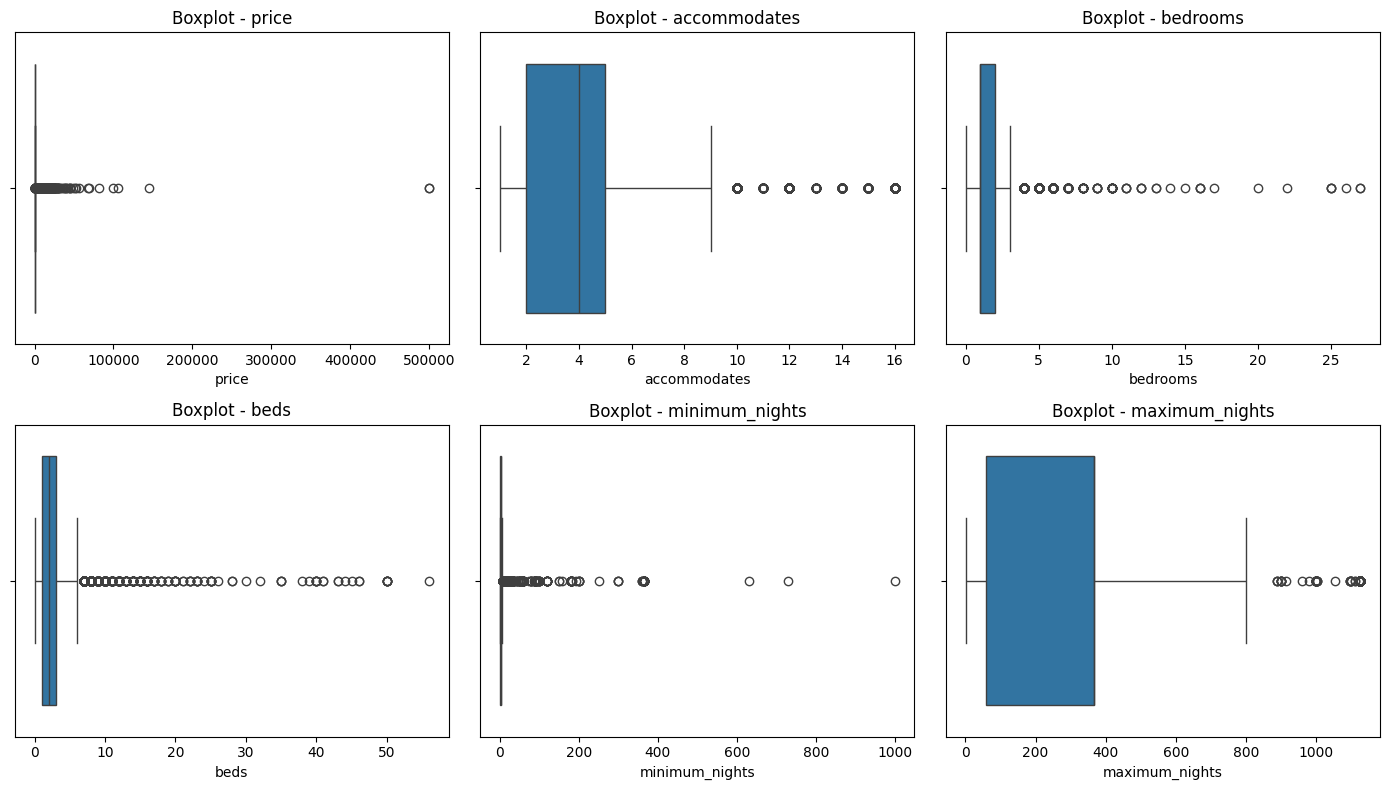

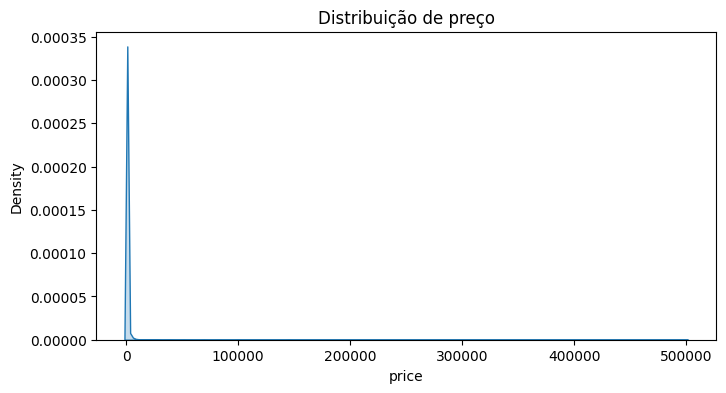

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
axes = axes.ravel()
for ax, col in zip(axes, ['price','accommodates','bedrooms','beds','minimum_nights','maximum_nights']):
    sns.boxplot(x=rio_listings[col], ax=ax)
    ax.set_title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(rio_listings['price'], fill=True)
plt.title('Distribuição de preço')
plt.show()

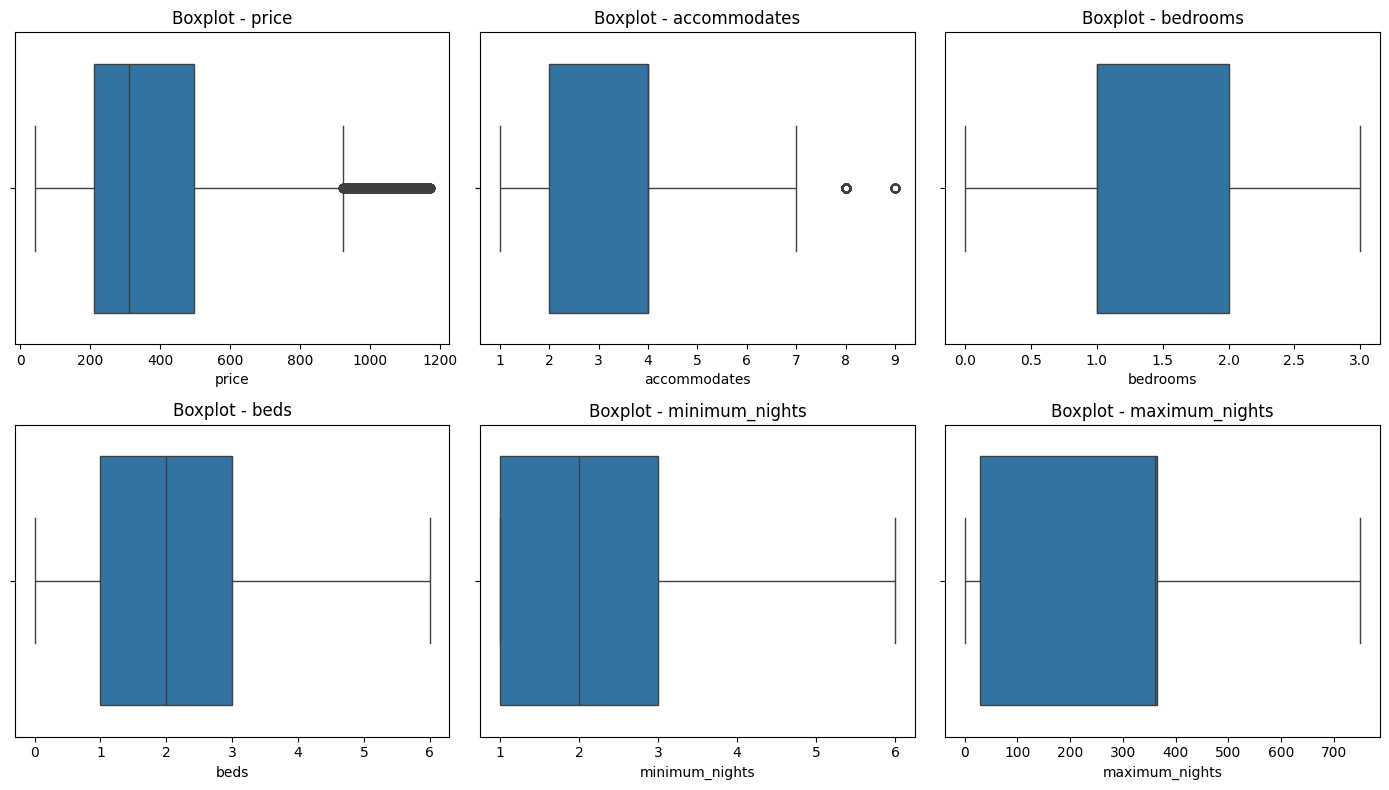

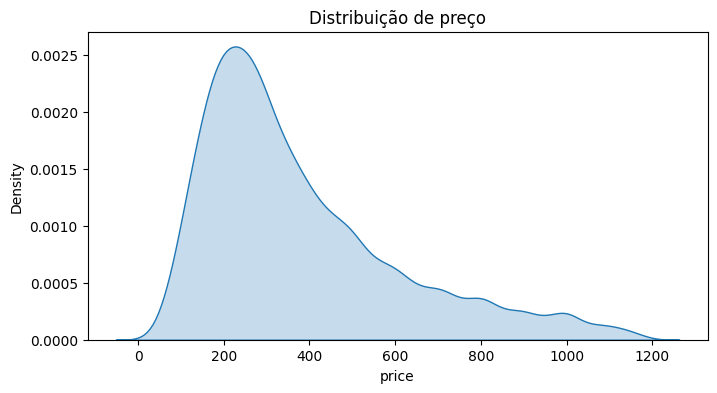

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8))
axes = axes.ravel()
for ax, col in zip(axes, ['price','accommodates','bedrooms','beds','minimum_nights','maximum_nights']):
    sns.boxplot(x=rio_iqr[col], ax=ax)
    ax.set_title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.kdeplot(rio_iqr['price'], fill=True)
plt.title('Distribuição de preço')
plt.show()


In [19]:
import numpy as np
import pandas as pd

def add_simple_features_no_leakage(
    df,
    cols=("accommodates","bathrooms","bedrooms","beds","minimum_nights","maximum_nights","number_of_reviews")
):
    df = df.copy()
    if isinstance(df, pd.Series):
        df = df.to_frame().T

    # segurança: evita divisões por zero
    def sdiv(a, b, eps=1e-9):
        return a / (b.replace(0, np.nan))  # vira NaN quando divisor=0

    # Relações estruturais entre cômodos/pessoas
    if all(c in df for c in ["accommodates","bedrooms"]):
        df["accommodates_per_bedroom"] = sdiv(df["accommodates"], df["bedrooms"])
    if all(c in df for c in ["accommodates","bathrooms"]):
        df["accommodates_per_bathroom"] = sdiv(df["accommodates"], df["bathrooms"])
    if all(c in df for c in ["beds","bedrooms"]):
        df["beds_per_bedroom"] = sdiv(df["beds"], df["bedrooms"])

    # Regras de estadia
    if all(c in df for c in ["minimum_nights","maximum_nights"]):
        df["stay_span"] = (df["maximum_nights"] - df["minimum_nights"]).clip(lower=0)

    # Reviews
    # (normalizações simples; você pode padronizar depois no pipeline)
    if "number_of_reviews" in df:
        df["has_reviews"] = (df["number_of_reviews"] > 0).astype(np.float32)

    # Limpeza: NaN/Inf -> 0 (ou escolha outra imputação)
    new_cols = [c for c in df.columns if c not in cols and c != "price"]
    df[new_cols] = df[new_cols].replace([np.inf, -np.inf], np.nan).fillna(0.0).astype(np.float32)

    return df


In [20]:
# 1) Gerar features SEM vazamento
rio_iqr = add_simple_features_no_leakage(rio_iqr)

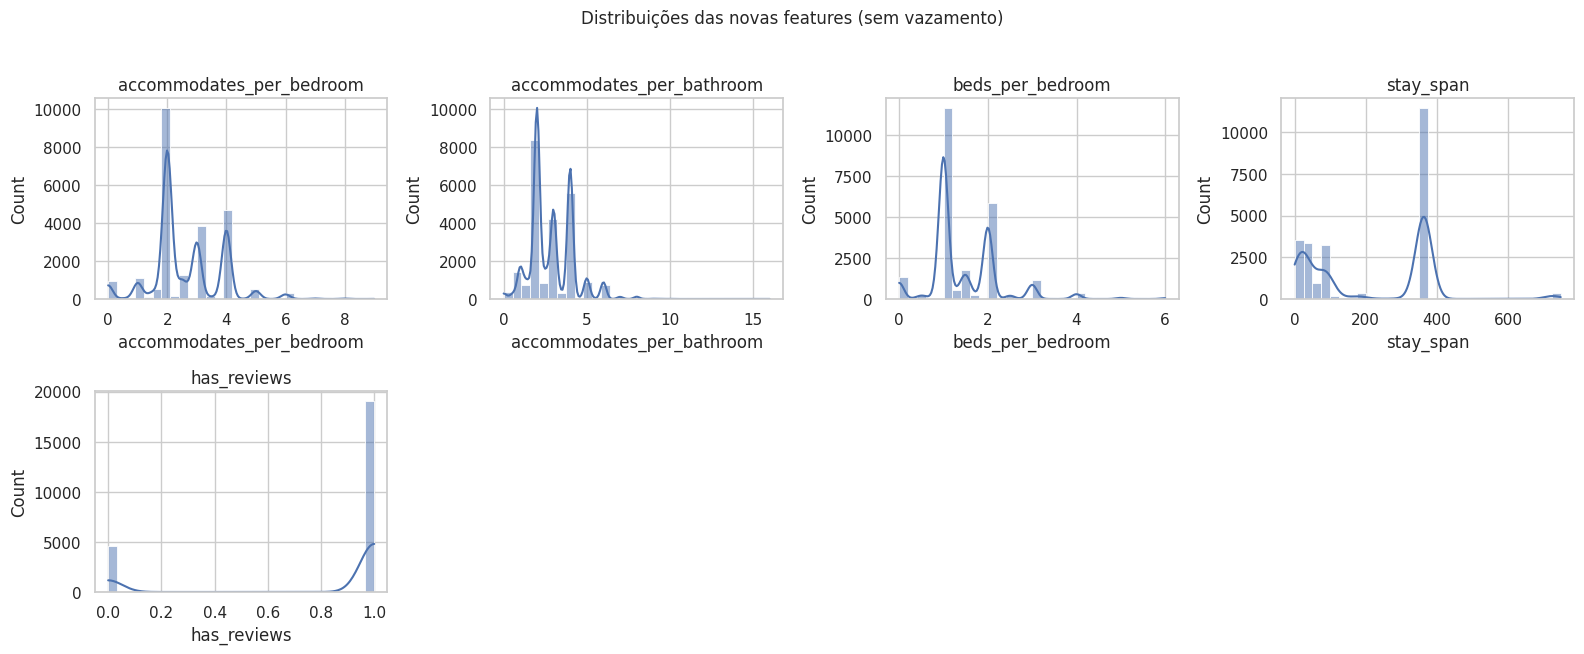

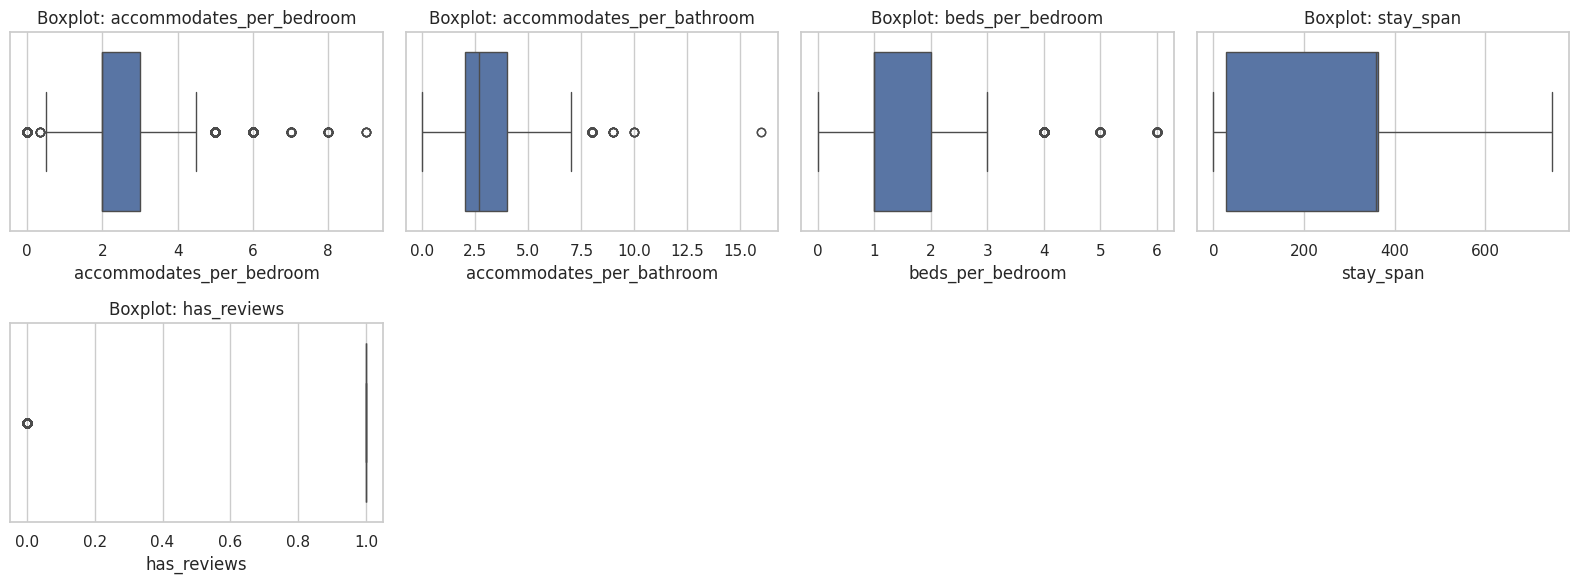

/tmp/ipython-input-979270261.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corr.index, x=corr.values, palette="viridis")


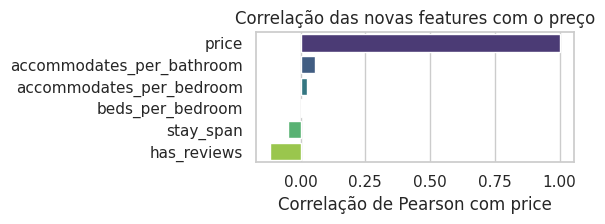

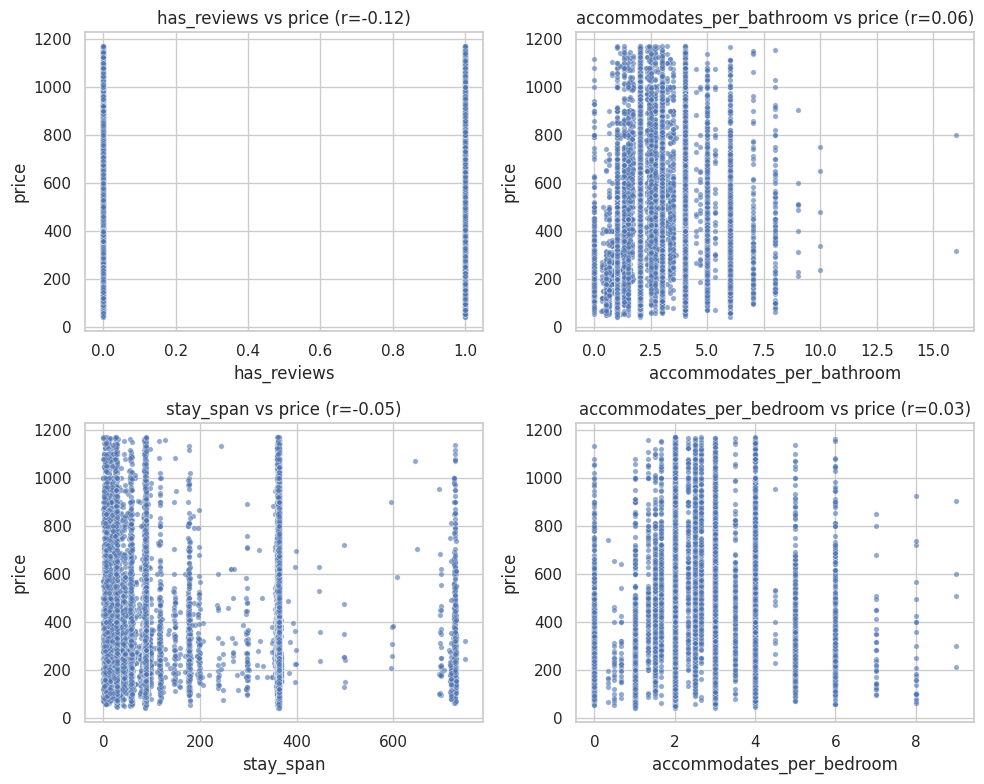

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- 1) defina a lista de novas features "sem vazamento" (as que sua função cria) ---
candidate_new_feats = [
    "accommodates_per_bedroom",
    "accommodates_per_bathroom",
    "beds_per_bedroom",
    "stay_span",
    "has_reviews",
]

# mantenha só as que existem no DF
new_features = [c for c in candidate_new_feats if c in rio_iqr.columns]
assert len(new_features) > 0, "Nenhuma nova feature encontrada no DataFrame."

# --- 2) helper: série saneada (sem inf/NaN) para plot ---
def clean_series(s):
    s = s.replace([np.inf, -np.inf], np.nan)
    return s.dropna()

# --- 3) Histogramas (distribuições) ---
n = len(new_features)
cols = min(4, n)
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.2*rows))
axes = np.array(axes).reshape(rows, cols)

for i, col in enumerate(new_features):
    r, c = divmod(i, cols)
    sns.histplot(clean_series(rio_iqr[col]), bins=30, kde=True, ax=axes[r, c])
    axes[r, c].set_title(col)
# esconder eixos vazios
for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    axes[r, c].axis("off")
plt.suptitle("Distribuições das novas features (sem vazamento)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

# --- 4) Boxplots (dispersão e outliers) ---
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.0*rows))
axes = np.array(axes).reshape(rows, cols)
for i, col in enumerate(new_features):
    r, c = divmod(i, cols)
    sns.boxplot(x=clean_series(rio_iqr[col]), ax=axes[r, c])
    axes[r, c].set_title(f"Boxplot: {col}")
for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    axes[r, c].axis("off")
plt.tight_layout()
plt.show()

# --- 5) Correlação com o preço ---
cols_for_corr = [c for c in new_features if rio_iqr[c].dtype != "O"] + ["price"]
corr = rio_iqr[cols_for_corr].replace([np.inf, -np.inf], np.nan).dropna().corr(numeric_only=True)["price"].sort_values(ascending=False)

plt.figure(figsize=(6, 0.4*len(corr)))
sns.barplot(y=corr.index, x=corr.values, palette="viridis")
plt.title("Correlação das novas features com o preço")
plt.xlabel("Correlação de Pearson com price")
plt.ylabel("")
plt.tight_layout()
plt.show()

# --- 6) (Opcional) Scatter vs preço para as top-4 por |correlação| ---
top_k = 4
top_feats = corr.abs().sort_values(ascending=False).index.tolist()
top_feats = [f for f in top_feats if f != "price"][:top_k]

if len(top_feats) > 0:
    cols = min(2, len(top_feats))
    rows = int(np.ceil(len(top_feats)/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axes = np.array(axes).reshape(rows, cols)
    for i, col in enumerate(top_feats):
        r, c = divmod(i, cols)
        dfp = rio_iqr[[col, "price"]].replace([np.inf, -np.inf], np.nan).dropna()
        sns.scatterplot(data=dfp, x=col, y="price", ax=axes[r, c], s=15, alpha=0.6)
        axes[r, c].set_title(f"{col} vs price (r={dfp.corr(numeric_only=True).loc[col,'price']:.2f})")
    for j in range(i+1, rows*cols):
        r, c = divmod(j, cols)
        axes[r, c].axis("off")
    plt.tight_layout()
    plt.show()


## Correlation Heatmap of Rio Listings Features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute pairwise correlation matrix using Pearson's correlation coefficient
corr_matrix = rio_iqr.corr(method="pearson")

# Display features sorted by correlation strength with the target ('price')
# This helps identify which features are most relevant to predict 'price'
price_corr = corr_matrix["price"].sort_values(ascending=False)

print("Correlation of features with target 'price':\n")
print(price_corr)

Correlation of features with target 'price':

price                        1.00
bedrooms                     0.42
bathrooms                    0.38
accommodates                 0.38
beds                         0.29
minimum_nights               0.17
accommodates_per_bathroom    0.06
accommodates_per_bedroom     0.03
beds_per_bedroom             0.01
maximum_nights              -0.05
stay_span                   -0.05
number_of_reviews           -0.10
has_reviews                 -0.12
Name: price, dtype: float64


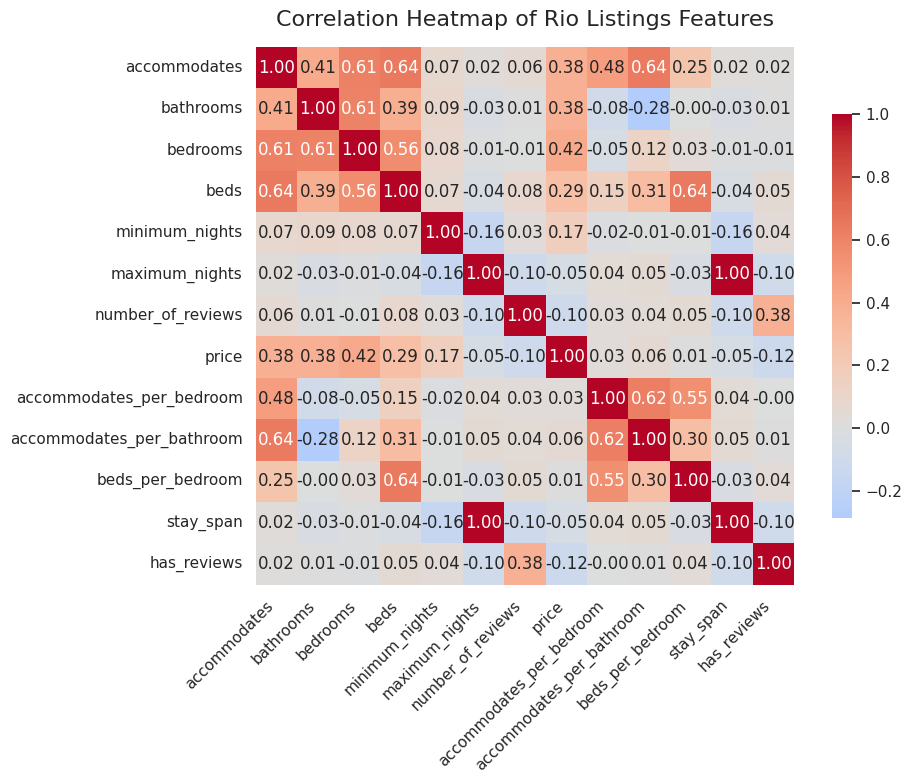

In [ ]:
# Visualize correlation matrix

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # format with 2 decimals
    cmap="coolwarm",     # colormap: negative=blue, positive=red
    center=0,            # center color scale at 0
    square=True,         # square cells
    cbar_kws={"shrink": 0.75}  # adjust colorbar size
)

# Add a title to the heatmap
plt.title("Correlation Heatmap of Rio Listings Features", fontsize=16, pad=15)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# End-to-End Solution Pipeline in PyTorch

## Import

In [22]:
import numpy as np
import datetime
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
import torch.optim as optim
import torch.nn as nn
%matplotlib inline
plt.style.use('fivethirtyeight')

## Architecture class

In [23]:
class Architecture(object):
    def __init__(self, model, loss_fn, optimizer):
        # Here we define the attributes of our class

        # We start by storing the arguments as attributes
        # to use them later
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        # Let's send the model to the specified device right away
        self.model.to(self.device)

        # These attributes are defined here, but since they are
        # not informed at the moment of creation, we keep them None
        self.train_loader = None
        self.val_loader = None

        # These attributes are going to be computed internally
        self.losses = []
        self.val_losses = []
        self.total_epochs = 0

        # Creates the train_step function for our model,
        # loss function and optimizer
        # Note: there are NO ARGS there! It makes use of the class
        # attributes directly
        self.train_step_fn = self._make_train_step_fn()
        # Creates the val_step function for our model and loss
        self.val_step_fn = self._make_val_step_fn()

    def to(self, device):
        # This method allows the user to specify a different device
        # It sets the corresponding attribute (to be used later in
        # the mini-batches) and sends the model to the device
        try:
            self.device = device
            self.model.to(self.device)
        except RuntimeError:
            self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
            print(f"Couldn't send it to {device}, sending it to {self.device} instead.")
            self.model.to(self.device)

    def set_loaders(self, train_loader, val_loader=None):
        # This method allows the user to define which train_loader (and val_loader, optionally) to use
        # Both loaders are then assigned to attributes of the class
        # So they can be referred to later
        self.train_loader = train_loader
        self.val_loader = val_loader

    def _make_train_step_fn(self):
        # This method does not need ARGS... it can refer to
        # the attributes: self.model, self.loss_fn and self.optimizer

        # Builds function that performs a step in the train loop
        def perform_train_step_fn(x, y):
            # Sets model to TRAIN mode
            self.model.train()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # Step 3 - Computes gradients for both "a" and "b" parameters
            loss.backward()
            # Step 4 - Updates parameters using gradients and the learning rate
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Returns the loss
            return loss.item()

        # Returns the function that will be called inside the train loop
        return perform_train_step_fn

    def _make_val_step_fn(self):
        # Builds function that performs a step in the validation loop
        def perform_val_step_fn(x, y):
            # Sets model to EVAL mode
            self.model.eval()

            # Step 1 - Computes our model's predicted output - forward pass
            yhat = self.model(x)
            # Step 2 - Computes the loss
            loss = self.loss_fn(yhat, y)
            # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
            return loss.item()

        return perform_val_step_fn

    def _mini_batch(self, validation=False):
        # The mini-batch can be used with both loaders
        # The argument `validation`defines which loader and
        # corresponding step function is going to be used
        if validation:
            data_loader = self.val_loader
            step_fn = self.val_step_fn
        else:
            data_loader = self.train_loader
            step_fn = self.train_step_fn

        if data_loader is None:
            return None

        # Once the data loader and step function, this is the same
        # mini-batch loop we had before
        mini_batch_losses = []
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(self.device)
            y_batch = y_batch.to(self.device)

            mini_batch_loss = step_fn(x_batch, y_batch)
            mini_batch_losses.append(mini_batch_loss)

        loss = np.mean(mini_batch_losses)
        return loss

    def set_seed(self, seed=42):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(seed)
        np.random.seed(seed)

    def train(self, n_epochs, seed=42):
        # To ensure reproducibility of the training process
        self.set_seed(seed)

        for epoch in range(n_epochs):
            # Keeps track of the numbers of epochs
            # by updating the corresponding attribute
            self.total_epochs += 1

            # inner loop
            # Performs training using mini-batches
            loss = self._mini_batch(validation=False)
            self.losses.append(loss)

            # VALIDATION
            # no gradients in validation!
            with torch.no_grad():
                # Performs evaluation using mini-batches
                val_loss = self._mini_batch(validation=True)
                self.val_losses.append(val_loss)

    def save_checkpoint(self, filename):
        # Builds dictionary with all elements for resuming training
        checkpoint = {'epoch': self.total_epochs,
                      'model_state_dict': self.model.state_dict(),
                      'optimizer_state_dict': self.optimizer.state_dict(),
                      'loss': self.losses,
                      'val_loss': self.val_losses}

        torch.save(checkpoint, filename)

    def load_checkpoint(self, filename):
        # Loads dictionary
        checkpoint = torch.load(filename,weights_only=False)

        # Restore state for model and optimizer
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        self.total_epochs = checkpoint['epoch']
        self.losses = checkpoint['loss']
        self.val_losses = checkpoint['val_loss']

        self.model.train() # always use TRAIN for resuming training

    def predict(self, x):
        # Set is to evaluation mode for predictions
        self.model.eval()
        # Takes aNumpy input and make it a float tensor
        x_tensor = torch.as_tensor(x).float()
        # Send input to device and uses model for prediction
        y_hat_tensor = self.model(x_tensor.to(self.device))
        # Set it back to train mode
        self.model.train()
        # Detaches it, brings it to CPU and back to Numpy
        return y_hat_tensor.detach().cpu().numpy()

    def plot_losses(self):
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')
        plt.plot(self.val_losses, label='Validation Loss', c='r')
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig

## Data Preparation

In [24]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23715 entries, 2 to 42012
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accommodates               23715 non-null  int64  
 1   bathrooms                  23715 non-null  float64
 2   bedrooms                   23715 non-null  float64
 3   beds                       23715 non-null  float64
 4   minimum_nights             23715 non-null  int64  
 5   maximum_nights             23715 non-null  int64  
 6   number_of_reviews          23715 non-null  int64  
 7   price                      23715 non-null  float64
 8   accommodates_per_bedroom   23715 non-null  float32
 9   accommodates_per_bathroom  23715 non-null  float32
 10  beds_per_bedroom           23715 non-null  float32
 11  stay_span                  23715 non-null  float32
 12  has_reviews                23715 non-null  float32
dtypes: float32(5), float64(4), int64(4)
memory usage: 2

In [ ]:
leaky_cols = ["price_per_person", "price_per_bedroom", "price_per_bathroom"]

feature_cols = [c for c in rio_iqr.columns if c not in ["price"] + leaky_cols]
target_col   = "price"

X = rio_iqr[feature_cols].to_numpy(dtype=np.float32)
y = rio_iqr[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)

In [27]:
# ---------------------------------------------------------------------
# 1) Extract features (X) and target (y) from the DataFrame
# ---------------------------------------------------------------------

# Keep all numeric feature columns except the target 'price'
feature_cols = [c for c in rio_iqr.columns if c != "price"]
target_col   = "price"

# Convert to NumPy arrays (float32 is ideal for PyTorch)
X = rio_iqr[feature_cols].to_numpy(dtype=np.float32)     # shape (N, D)
y = rio_iqr[target_col].to_numpy(dtype=np.float32).reshape(-1, 1)  # shape (N, 1)

# Quick sanity checks
assert not np.isnan(X).any(), "Found NaNs in X. Clean/impute before training."
assert not np.isnan(y).any(), "Found NaNs in y. Clean/impute before training."

In [28]:
# ---------------------------------------------------------------------
# 2) Build tensors BEFORE splitting (as you requested)
# ---------------------------------------------------------------------

torch.manual_seed(13)

x_tensor = torch.as_tensor(X).float()   # (N, D)
y_tensor = torch.as_tensor(y).float()   # (N, 1)

# Whole dataset
dataset = TensorDataset(x_tensor, y_tensor)

In [29]:
# ---------------------------------------------------------------------
# 3) Train/validation split using PyTorch's random_split
# ---------------------------------------------------------------------
ratio = 0.8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val   = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

In [30]:
type(train_data)

torch.utils.data.dataset.Subset

In [31]:
type(val_data)

torch.utils.data.dataset.Subset

In [ ]:
# ============================================================
# Comparação de normalizações (com sua Architecture) — Didático
# ============================================================
import math, torch, numpy as np, pandas as pd
from torch import nn
from torch.utils.data import TensorDataset, Subset, DataLoader
import torch.optim as optim

# ----------------------------
# 1) Acessar índices do split
# ----------------------------
train_idx = train_data.indices
val_idx   = val_data.indices

# ----------------------------------------------------
# 2) Helpers de normalização (fit/transform/inverse)
# ----------------------------------------------------
def fit_stats(x_train, kind="zscore", eps=1e-8):
    if kind == "none":
        return {}
    if kind == "zscore":
        mu  = x_train.mean(0)
        std = x_train.std(0, unbiased=False)
        std = torch.where(std < eps, torch.ones_like(std), std)
        return {"mu": mu, "std": std}
    if kind == "minmax":
        xmin = x_train.min(0).values
        xmax = x_train.max(0).values
        rng  = torch.clamp(xmax - xmin, min=eps)
        return {"xmin": xmin, "rng": rng}
    if kind == "robust":
        q1  = x_train.quantile(0.25, dim=0)
        q3  = x_train.quantile(0.75, dim=0)
        med = x_train.median(0).values
        iqr = torch.clamp(q3 - q1, min=eps)
        return {"med": med, "iqr": iqr}
    if kind == "maxabs":
        maxabs = torch.clamp(x_train.abs().max(0).values, min=eps)
        return {"maxabs": maxabs}
    raise ValueError(f"Scaler '{kind}' não suportado.")

def transform(x, stats, kind="zscore"):
    if kind == "none":   return x
    if kind == "zscore": return (x - stats["mu"]) / stats["std"]
    if kind == "minmax": return (x - stats["xmin"]) / stats["rng"]
    if kind == "robust": return (x - stats["med"]) / stats["iqr"]
    if kind == "maxabs": return x / stats["maxabs"]

def inverse_transform(x_scaled, stats, kind="zscore"):
    if kind == "none":   return x_scaled
    if kind == "zscore": return x_scaled * stats["std"] + stats["mu"]
    if kind == "minmax": return x_scaled * stats["rng"] + stats["xmin"]
    if kind == "robust": return x_scaled * stats["iqr"] + stats["med"]
    if kind == "maxabs": return x_scaled * stats["maxabs"]

# ----------------------------------------------------
# 3) Métricas no espaço ORIGINAL do alvo
# ----------------------------------------------------
def rmse(a, b):
    return math.sqrt(torch.mean((a - b)**2).item())
def mae(a, b):
    return torch.mean(torch.abs(a - b)).item()
def r2(a, b):
    ss_res = torch.sum((a - b)**2)
    ss_tot = torch.sum((b - torch.mean(b))**2)
    return (1 - ss_res/ss_tot).item() if ss_tot > 0 else float("nan")

# ----------------------------------------------------
# 4) Construção do modelo/otimizador/critério
#    (use sua Architecture!)
# ----------------------------------------------------
D = x_tensor.shape[1]

def build_model():
    # troque aqui pela sua rede final, se quiser
    return nn.Sequential(nn.Linear(D, 1))

def build_optimizer(model, lr=1e-3):
    return optim.SGD(model.parameters(), lr=lr)

def build_loss():
    return nn.MSELoss(reduction='mean')

# ----------------------------------------------------
# 5) Loop de normalizações
#    y sempre em z-score para estabilizar treino;
#    métricas SEMPRE no espaço original do y.
# ----------------------------------------------------
x_kinds = ["none", "zscore", "minmax", "robust", "maxabs"]
y_kind  = "zscore"

epochs     = 100
batch_size = 16
seed       = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
np.random.seed(seed)

results = []

for kind in x_kinds:
    # ----- fit stats no TREINO -----
    x_stats = fit_stats(x_tensor[train_idx], kind=kind)
    y_stats = fit_stats(y_tensor[train_idx], kind=y_kind)

    # ----- aplicar transform em TODOS com stats do treino -----
    x_sc = transform(x_tensor, x_stats, kind=kind)
    y_sc = transform(y_tensor, y_stats, kind=y_kind)

    ds_sc = TensorDataset(x_sc, y_sc)
    tr_sc = Subset(ds_sc, train_idx)
    va_sc = Subset(ds_sc, val_idx)

    train_loader = DataLoader(tr_sc, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(va_sc, batch_size=batch_size, shuffle=False)

    # ----- novo modelo p/ cada normalização -----
    model     = build_model()
    optimizer = build_optimizer(model, lr=0.001)
    loss_fn   = build_loss()

    arch = Architecture(model, loss_fn, optimizer)
    arch.set_seed(seed)
    arch.set_loaders(train_loader, val_loader)
    arch.train(n_epochs=epochs)

    # ----- avaliar no val: obter preds no espaço ESCALADO -----
    arch.model.eval()
    preds_sc, gts_sc = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            p  = arch.model(xb).detach().cpu()
            preds_sc.append(p)
            gts_sc.append(yb)
    preds_sc = torch.cat(preds_sc, dim=0).squeeze()
    gts_sc   = torch.cat(gts_sc, dim=0).squeeze()

    # ----- trazer para o espaço ORIGINAL do y -----
    preds = inverse_transform(preds_sc, y_stats, kind=y_kind)
    gts   = inverse_transform(gts_sc,   y_stats, kind=y_kind)

    # ----- métricas -----
    m_rmse = rmse(preds, gts)
    m_mae  = mae(preds, gts)
    m_r2   = r2(preds, gts)

    results.append({
        "x_scaler": kind,
        "y_scaler": y_kind,
        "RMSE_val": m_rmse,
        "MAE_val":  m_mae,
        "R2_val":   m_r2,
        "last_train_loss": arch.losses[-1],
        "last_val_loss":   arch.val_losses[-1],
    })

# ----------------------------------------------------
# 6) Resumo e justificativa didática
# ----------------------------------------------------
res_df = pd.DataFrame(results).sort_values("RMSE_val").reset_index(drop=True)
display(res_df)

winner = res_df.iloc[0].to_dict()

print("\n================= Escolha da normalização (didático) =================")
print("- Critério principal: menor RMSE em validação, calculado no ESPAÇO ORIGINAL do alvo.")
print("- Mantivemos modelo, épocas, otimizador e split fixos, isolando o efeito da escala.")
print(f"- Normalização vencedora para X: {winner['x_scaler']} (y sempre {winner['y_scaler']}).")
print(f"- Métricas do vencedor: RMSE={winner['RMSE_val']:.4f} | MAE={winner['MAE_val']:.4f} | R²={winner['R2_val']:.4f}")
print("- Observação: em caso de empate em RMSE, use MAE e R² como desempate, e repita com outras seeds para checar consistência.")


,x_scaler,y_scaler,RMSE_val,MAE_val,R2_val,last_train_loss,last_val_loss
0,zscore,zscore,199.983798,150.666519,0.249893,0.735816,0.734416
1,minmax,zscore,200.329270,151.123825,0.247299,0.736401,0.736950
2,maxabs,zscore,200.392389,151.182785,0.246824,0.736681,0.737416
3,none,zscore,NaN,NaN,NaN,NaN,NaN
4,robust,zscore,NaN,NaN,NaN,NaN,NaN



================= Escolha da normalização (didático) =================
- Critério principal: menor RMSE em validação, calculado no ESPAÇO ORIGINAL do alvo.
- Mantivemos modelo, épocas, otimizador e split fixos, isolando o efeito da escala.
- Normalização vencedora para X: zscore (y sempre zscore).
- Métricas do vencedor: RMSE=199.9838 | MAE=150.6665 | R²=0.2499
- Observação: em caso de empate em RMSE, use MAE e R² como desempate, e repita com outras seeds para checar consistência.


,opt,lr,RMSE_val,MAE_val,R2_val
0,RMSprop,0.0010,197.114804,147.540024,0.271261
1,AdamW,0.0001,197.148550,147.215683,0.271011
2,Adam,0.0001,197.179219,147.275833,0.270784
3,Adagrad,0.0050,197.217708,148.124847,0.270500
4,SGD_mom,0.0005,197.309996,148.207642,0.269817
5,SGD,0.0050,197.522408,148.438354,0.268244



=== Escolha de otimizadores (didático) ===
- Para cada otimizador, buscamos a melhor taxa de aprendizado (LR) em uma grade curta.
- Critério: menor RMSE em validação (métricas no espaço ORIGINAL do alvo).
- Mantivemos mesma arquitetura, épocas, batch, seed e normalização (X: zscore | y: zscore ).


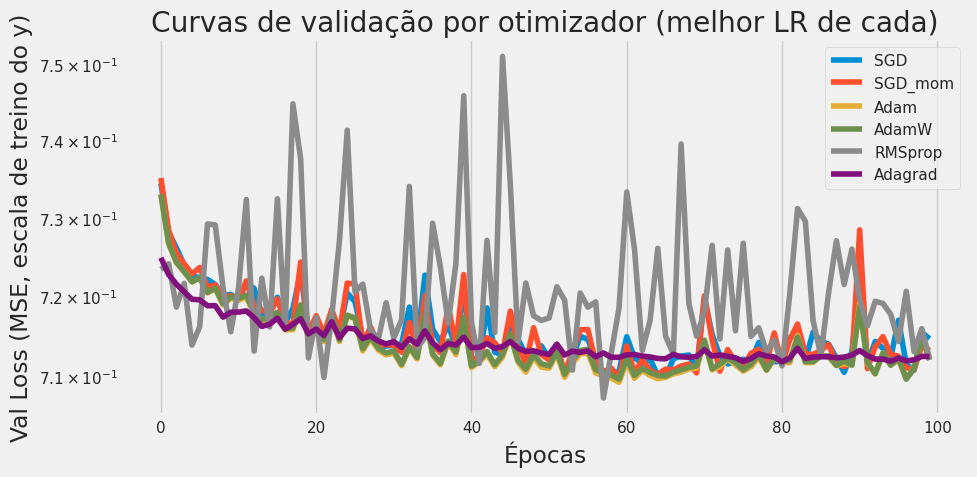

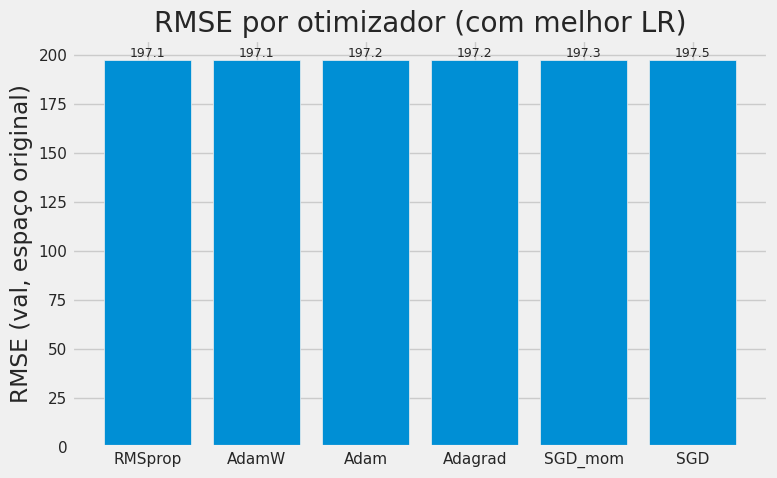

In [ ]:
# ============================================================
# Comparação de OTIMIZADORES (com sua Architecture)
# ============================================================
import math, torch, numpy as np, pandas as pd, matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import TensorDataset, Subset, DataLoader
import torch.optim as optim

# ----------------------------
# 0) Definições e utils
# ----------------------------
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)

def rmse(a, b):
    return math.sqrt(torch.mean((a - b)**2).item())
def mae(a, b):
    return torch.mean(torch.abs(a - b)).item()
def r2(a, b):
    ss_res = torch.sum((a - b)**2)
    ss_tot = torch.sum((b - torch.mean(b))**2)
    return (1 - ss_res/ss_tot).item() if ss_tot > 0 else float("nan")

# ----------------------------
# 1) Normalização (fixa)
#    -> use a vencedora que você achou antes
# ----------------------------
train_idx = train_data.indices
val_idx   = val_data.indices

def fit_stats(x_train, kind="zscore", eps=1e-8):
    if kind == "none":  return {}
    if kind == "zscore":
        mu  = x_train.mean(0)
        std = x_train.std(0, unbiased=False)
        std = torch.where(std < eps, torch.ones_like(std), std)
        return {"mu": mu, "std": std}
    if kind == "minmax":
        xmin = x_train.min(0).values
        xmax = x_train.max(0).values
        rng  = torch.clamp(xmax - xmin, min=eps)
        return {"xmin": xmin, "rng": rng}
    if kind == "robust":
        q1  = x_train.quantile(0.25, dim=0)
        q3  = x_train.quantile(0.75, dim=0)
        med = x_train.median(0).values
        iqr = torch.clamp(q3 - q1, min=eps)
        return {"med": med, "iqr": iqr}
    if kind == "maxabs":
        maxabs = torch.clamp(x_train.abs().max(0).values, min=eps)
        return {"maxabs": maxabs}

def transform(x, stats, kind="zscore"):
    if kind == "none":   return x
    if kind == "zscore": return (x - stats["mu"]) / stats["std"]
    if kind == "minmax": return (x - stats["xmin"]) / stats["rng"]
    if kind == "robust": return (x - stats["med"]) / stats["iqr"]
    if kind == "maxabs": return x / stats["maxabs"]

def inverse_transform(x_scaled, stats, kind="zscore"):
    if kind == "none":   return x_scaled
    if kind == "zscore": return x_scaled * stats["std"] + stats["mu"]
    if kind == "minmax": return x_scaled * stats["rng"] + stats["xmin"]
    if kind == "robust": return x_scaled * stats["iqr"] + stats["med"]
    if kind == "maxabs": return x_scaled * stats["maxabs"]

# escolha aqui a normalização fixa
x_kind = "zscore"  # <- use "zscore"/"minmax"/"maxabs" se preferir
y_kind = "zscore"

x_stats = fit_stats(x_tensor[train_idx], kind=x_kind)
y_stats = fit_stats(y_tensor[train_idx], kind=y_kind)

x_sc = transform(x_tensor, x_stats, kind=x_kind)
y_sc = transform(y_tensor, y_stats, kind=y_kind)

ds_sc = TensorDataset(x_sc, y_sc)
tr_sc = Subset(ds_sc, train_idx)
va_sc = Subset(ds_sc, val_idx)

# ----------------------------
# 2) Modelo base (mesmo p/ todos)
# ----------------------------
D = x_tensor.shape[1]
def build_model():
    # mantenho seu baseline; troque aqui pela sua rede final se quiser
    return nn.Sequential(nn.Linear(D, 64), nn.ReLU(),
                         nn.Linear(64, 64), nn.ReLU(),
                         nn.Linear(64, 1))

loss_fn = nn.MSELoss(reduction='mean')

# ----------------------------
# 3) Otimizadores + grades de LR curtas
# ----------------------------
OPTIMIZERS = {
    "SGD":       lambda params, lr: optim.SGD(params, lr=lr),
    "SGD_mom":   lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9),
    "Adam":      lambda params, lr: optim.Adam(params, lr=lr),
    "AdamW":     lambda params, lr: optim.AdamW(params, lr=lr),
    "RMSprop":   lambda params, lr: optim.RMSprop(params, lr=lr, momentum=0.9),
    "Adagrad":   lambda params, lr: optim.Adagrad(params, lr=lr),
}
# grades de LR (curtas e realistas) — ajuste se quiser refinar
LR_GRID = {
    "SGD":     [5e-4, 1e-3, 5e-3],
    "SGD_mom": [5e-4, 1e-3, 5e-3],
    "Adam":    [1e-4, 5e-4, 1e-3],
    "AdamW":   [1e-4, 5e-4, 1e-3],
    "RMSprop": [1e-4, 5e-4, 1e-3],
    "Adagrad": [5e-4, 1e-3, 5e-3],
}

# ----------------------------
# 4) Treino/Avaliação
# ----------------------------
def train_eval(epochs=80, batch_size=32, seed=42, lr=1e-3, opt_name="Adam"):
    set_seed(seed)
    train_loader = DataLoader(tr_sc, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(va_sc, batch_size=batch_size, shuffle=False)

    model = build_model().to(device)
    optimizer = OPTIMIZERS[opt_name](model.parameters(), lr=lr)

    # sua Architecture
    arch = Architecture(model, loss_fn, optimizer)
    arch.set_seed(seed)
    arch.set_loaders(train_loader, val_loader)
    arch.train(n_epochs=epochs)

    # preds no espaço ESCALADO
    model.eval()
    preds_sc, gts_sc = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            p  = model(xb).detach().cpu()
            preds_sc.append(p)
            gts_sc.append(yb)
    preds_sc = torch.cat(preds_sc, dim=0).squeeze()
    gts_sc   = torch.cat(gts_sc, dim=0).squeeze()

    # volta ao espaço ORIGINAL do y
    preds = inverse_transform(preds_sc, y_stats, kind=y_kind)
    gts   = inverse_transform(gts_sc,   y_stats, kind=y_kind)

    metrics = {
        "RMSE_val": rmse(preds, gts),
        "MAE_val":  mae(preds, gts),
        "R2_val":   r2(preds, gts),
    }
    return metrics, arch.losses, arch.val_losses

# ----------------------------
# 5) Loop: melhor LR por otimizador
# ----------------------------
all_histories = {}  # opt_name -> {"val_curve": [...], "train_curve":[...]}
rows = []

epochs=100
batch_size=32
seed=42

for opt_name in OPTIMIZERS.keys():
    best = None
    best_hist = None
    for lr in LR_GRID[opt_name]:
        metrics, tr_curve, va_curve = train_eval(
            epochs=epochs, batch_size=batch_size, seed=seed, lr=lr, opt_name=opt_name
        )
        # critério: menor RMSE em validação
        score = metrics["RMSE_val"]
        if (best is None) or (score < best["RMSE_val"]):
            best = {"opt": opt_name, "lr": lr, **metrics}
            best_hist = {"train": tr_curve, "val": va_curve}
    rows.append(best)
    all_histories[opt_name] = best_hist

res_df = pd.DataFrame(rows).sort_values("RMSE_val").reset_index(drop=True)
display(res_df)

print("\n=== Escolha de otimizadores (didático) ===")
print("- Para cada otimizador, buscamos a melhor taxa de aprendizado (LR) em uma grade curta.")
print("- Critério: menor RMSE em validação (métricas no espaço ORIGINAL do alvo).")
print("- Mantivemos mesma arquitetura, épocas, batch, seed e normalização (X:", x_kind, "| y:", y_kind, ").")

# ----------------------------
# 6) Plots
# ----------------------------
# (a) Curva de validação por época (melhor LR de cada otimizador)
plt.figure(figsize=(10,5))
for opt_name, hist in all_histories.items():
    plt.plot(hist["val"], label=f"{opt_name}")
plt.yscale("log")
plt.xlabel("Épocas")
plt.ylabel("Val Loss (MSE, escala de treino do y)")
plt.title("Curvas de validação por otimizador (melhor LR de cada)")
plt.legend()
plt.tight_layout()
plt.show()

# (b) Barras: RMSE por otimizador (melhor LR)
plt.figure(figsize=(8,5))
plt.bar(res_df["opt"], res_df["RMSE_val"])
plt.ylabel("RMSE (val, espaço original)")
plt.title("RMSE por otimizador (com melhor LR)")
for i,(o,rmse_v) in enumerate(zip(res_df["opt"], res_df["RMSE_val"])):
    plt.text(i, rmse_v, f"{rmse_v:.1f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()


In [32]:
# ---------------------------------------------------------------------
# Z-score without leakage
# ---------------------------------------------------------------------
from torch.utils.data import Subset

# 0) Get split indices produced by random_split (already done above)
train_idx = train_data.indices
val_idx   = val_data.indices

# 1) Compute mean/std ONLY on training subset
eps = 1e-8
mu  = x_tensor[train_idx].mean(dim=0)
std = x_tensor[train_idx].std(dim=0, unbiased=False)
std = torch.where(std < eps, torch.ones_like(std), std)  # avoid divide-by-zero

y_mu  = y_tensor[train_idx].mean(dim=0)
y_std = y_tensor[train_idx].std(dim=0, unbiased=False)
y_std = torch.where(y_std < eps, torch.ones_like(y_std), y_std)


# 2) Apply z-score to ALL features using training stats
x_tensor_z = (x_tensor - mu) / std
y_tensor_z = (y_tensor - y_mu) / y_std


# 3) Rebuild dataset with normalized features and REUSE the SAME indices
dataset_z  = TensorDataset(x_tensor_z, y_tensor_z)
train_data = Subset(dataset_z, train_idx)
val_data   = Subset(dataset_z, val_idx)

In [33]:
# 4) Recreate the DataLoaders
batch_size  = 16
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(dataset=val_data,   batch_size=batch_size, shuffle=False)

# Quick peek to confirm shapes
xb, yb = next(iter(train_loader))
print(f"Train batch X: {xb.shape} | y: {yb.shape}")  # e.g., (16, D) and (16, 1)

Train batch X: torch.Size([16, 12]) | y: torch.Size([16, 1])


## Model Configuration

In [ ]:
# setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 1e-2

D = x_tensor.shape[1]
model = nn.Sequential(nn.Linear(D, 1)).to(device)   # <-- mover antes

# crie o otimizador depois que o modelo já está no device
optimizer = optim.Adagrad(
    model.parameters(),
    lr=lr,
    lr_decay=0.0,
    weight_decay=0.0,
    initial_accumulator_value=0.0,
    eps=1e-10
)

loss_fn = nn.MSELoss(reduction='mean')

# o Architecture não precisa mover de novo; já está no device certo
n_epochs = 100
arch = Architecture(model, loss_fn, optimizer)
arch.set_seed(42)
arch.set_loaders(train_loader, val_loader)
arch.train(n_epochs=n_epochs)


## Training

In [ ]:
n_epochs = 100
arch = Architecture(model, loss_fn, optimizer)
arch.set_seed(42)
arch.set_loaders(train_loader, val_loader)
arch.train(n_epochs=n_epochs)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

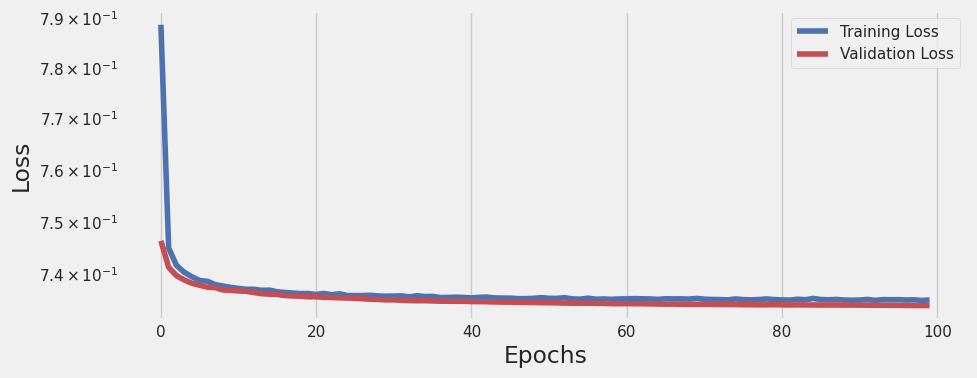

In [ ]:
fig = arch.plot_losses()

In [ ]:
rio_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23715 entries, 2 to 42012
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accommodates               23715 non-null  int64  
 1   bathrooms                  23715 non-null  float64
 2   bedrooms                   23715 non-null  float64
 3   beds                       23715 non-null  float64
 4   minimum_nights             23715 non-null  int64  
 5   maximum_nights             23715 non-null  int64  
 6   number_of_reviews          23715 non-null  int64  
 7   price                      23715 non-null  float64
 8   accommodates_per_bedroom   23715 non-null  float32
 9   accommodates_per_bathroom  23715 non-null  float32
 10  beds_per_bedroom           23715 non-null  float32
 11  stay_span                  23715 non-null  float32
 12  has_reviews                23715 non-null  float32
dtypes: float32(5), float64(4), int64(4)
memory usage: 2

In [ ]:
# -------- artefatos salvos do TREINO --------
feature_cols_base = [
    "accommodates","bathrooms","bedrooms","beds",
    "minimum_nights","maximum_nights","number_of_reviews"
]
# feature_cols é a ORDEM final usada no treino (depois do feature engineering)
# ex.: feature_cols = [ 'accommodates', ..., 'accommodates_per_bedroom', 'stay_span', 'has_reviews', ...]
# mu, std: tensores 1D de tamanho D (mesmo comprimento de feature_cols)
# y_mu, y_std: tensores escalares (ou 1D com shape [1])

# -------- função de pré-processamento para PREDIÇÃO --------
def preprocess_for_inference(X_raw_2d: np.ndarray) -> np.ndarray:
    """
    X_raw_2d: array shape (N, 7) nas colunas de feature_cols_base (mesma ordem).
    Retorna X_norm com shape (N, D) alinhado a feature_cols e normalizado com mu/std.
    """
    # 1) constrói DataFrame com as colunas BRUTAS na ordem correta
    df_new = pd.DataFrame(X_raw_2d, columns=feature_cols_base)

    # 2) aplica o mesmo feature engineering do treino
    df_new_fe = add_simple_features_no_leakage(df_new, cols=tuple(feature_cols_base))

    # 3) seleciona e reordena exatamente as colunas usadas no treino
    #    (se alguma coluna estiver faltando, isso vai acusar erro)
    X_full = df_new_fe[feature_cols].to_numpy(dtype=np.float32)

    # 4) normaliza com mu/std do TREINO
    X_t = torch.from_numpy(X_full)
    X_norm = (X_t - mu) / (std + 1e-8)

    return X_norm.numpy()

# ----------------- EXEMPLO DE USO -----------------
# Uma amostra nova com as 7 features brutas (mesma ordem de feature_cols_base)
X_new = np.array([[2.0, 1.0, 2.0, 2.0, 4.0, 100.0, 30.0]], dtype=np.float32)

# Gera as features derivadas, reordena e normaliza para o mesmo D do treino
X_new_norm = preprocess_for_inference(X_new)   # shape: (1, D)

# Predição no espaço padronizado de y
y_pred_z = arch.predict(X_new_norm)            # (1, 1) ou (1,)

# Desfaz a normalização do alvo para a unidade original
y_pred_real = y_pred_z * y_std.item() + y_mu.item()
y_pred_real_value = float(np.squeeze(y_pred_real))

print(f"Predicted price: R$ {y_pred_real_value:.2f}")


NameError: name 'arch' is not defined

In [25]:
!pip -q install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.2/86.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/

In [34]:
# --- 1) Definir features do zero (idempotente) e sem vazamento ---
import numpy as np, pandas as pd
from sklearn.impute import SimpleImputer

leaky_cols = ["price_per_person","price_per_bedroom","price_per_bathroom"]
base_cols  = ["accommodates","bathrooms","bedrooms","beds","minimum_nights","maximum_nights","number_of_reviews","price"]
target_col = "price"

# Novas features SEM vazamento
candidate_new_feats = [
    "accommodates_per_bedroom","accommodates_per_bathroom","beds_per_bedroom","stay_span","has_reviews"
]

# Começa do zero SEM usar estado anterior e garante unicidade preservando ordem
all_candidates = [c for c in rio_iqr.columns if c not in [target_col] + leaky_cols]
# prioriza manter a ordem original do DataFrame
feature_cols = []
for c in all_candidates + candidate_new_feats:
    if c != target_col and c in rio_iqr.columns and c not in feature_cols:
        feature_cols.append(c)

# --- 2) Split consistente com o PyTorch ---
df_train = rio_iqr.iloc[train_idx].copy()
df_val   = rio_iqr.iloc[val_idx].copy()

X_train = df_train[feature_cols].replace([np.inf, -np.inf], np.nan)
X_val   = df_val[feature_cols].replace([np.inf, -np.inf], np.nan)
y_train = df_train[target_col].astype(np.float32).values
y_val   = df_val[target_col].astype(np.float32).values

# --- 3) Imputação por mediana (apenas numéricos) ---
imp = SimpleImputer(strategy="median")
X_train_imp = pd.DataFrame(imp.fit_transform(X_train), columns=feature_cols, index=X_train.index)
X_val_imp   = pd.DataFrame(imp.transform(X_val),      columns=feature_cols, index=X_val.index)

# --- 4) GARANTIAS: nenhuma coluna duplicada / dtypes numéricos / sem NaN ---
# (a) unicidade dos nomes
if X_train_imp.columns.duplicated().any():
    # se por algum motivo ainda vier duplicado, remove duplicatas mantendo a 1ª ocorrência
    X_train_imp = X_train_imp.loc[:, ~X_train_imp.columns.duplicated()]
    X_val_imp   = X_val_imp.loc[:,   X_train_imp.columns]

# (b) tudo numérico
X_train_imp = X_train_imp.apply(pd.to_numeric, errors="coerce")
X_val_imp   = X_val_imp.apply(pd.to_numeric, errors="coerce")

# (c) sem NaN remanescentes
if np.isnan(X_train_imp.values).any() or np.isnan(X_val_imp.values).any():
    imp2 = SimpleImputer(strategy="median")
    X_train_imp = pd.DataFrame(imp2.fit_transform(X_train_imp), columns=X_train_imp.columns, index=X_train_imp.index)
    X_val_imp   = pd.DataFrame(imp2.transform(X_val_imp),      columns=X_val_imp.columns, index=X_val_imp.index)

print("Shapes:", X_train_imp.shape, X_val_imp.shape, "| #features únicas:", len(X_train_imp.columns))


Shapes: (18972, 12) (4743, 12) | #features únicas: 12


In [35]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lazy = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True, random_state=42)
models, preds = lazy.fit(X_train_imp, X_val_imp, y_train, y_val)

rows = []
bad = []

for name, y_pred in preds.items():
    try:
        if y_pred is None:
            bad.append((name, "None prediction"))
            continue
        y_pred = np.asarray(y_pred).ravel()
        if y_pred.shape[0] != y_val.shape[0]:
            bad.append((name, f"shape {y_pred.shape} != {y_val.shape}"))
            continue
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mae  = mean_absolute_error(y_val, y_pred)
        r2   = r2_score(y_val, y_pred)
        rows.append({"model": name, "RMSE_val": rmse, "MAE_val": mae, "R2_val": r2})
    except Exception as e:
        bad.append((name, str(e)))

if rows:
    lazy_table = pd.DataFrame(rows).sort_values("RMSE_val").reset_index(drop=True)
    display(lazy_table.head(15))
    lazy_table.to_csv("/content/lazypredict_val_ranking.csv", index=False)
    print("Ranking salvo em /content/lazypredict_val_ranking.csv")
else:
    print("Nenhuma predição válida em 'preds'. Mostrando fallback com a tabela do LazyPredict:")
    # Em algumas versões, a tabela do LazyPredict tem colunas: 'RMSE', 'R2', 'MAE', etc.
    cols_lower = [c.lower() for c in models.columns]
    if "rmse" in cols_lower:
        rmse_col = models.columns[cols_lower.index("rmse")]
        fallback = models.sort_values(rmse_col).reset_index()
    else:
        fallback = models.copy()
    display(fallback.head(15))
    fallback.to_csv("/content/lazypredict_fallback.csv", index=False)
    print("Fallback salvo em /content/lazypredict_fallback.csv")

# Log do que falhou (opcional)
if bad:
    print("\nModelos ignorados / problemas detectados:")
    for m, why in bad[:10]:
        print(f"- {m}: {why}")
    if len(bad) > 10:
        print(f"... (+{len(bad)-10} outros)")


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 18972, number of used features: 12
[LightGBM] [Info] Start training from score 381.805028
Nenhuma predição válida em 'preds'. Mostrando fallback com a tabela do LazyPredict:


,Model,Adjusted R-Squared,R-Squared,RMSE,Time Taken
0,LGBMRegressor,0.28,0.29,195.10,0.28
1,HistGradientBoostingRegressor,0.28,0.28,195.41,0.22
2,GradientBoostingRegressor,0.28,0.28,195.46,1.59
3,MLPRegressor,0.26,0.26,198.80,14.01
4,XGBRegressor,0.26,0.26,198.84,0.30
5,TransformedTargetRegressor,0.25,0.25,199.87,0.03
6,LinearRegression,0.25,0.25,199.87,0.02
7,Lars,0.25,0.25,199.87,0.03
8,LarsCV,0.25,0.25,199.87,0.07
9,Ridge,0.25,0.25,199.87,0.02


Fallback salvo em /content/lazypredict_fallback.csv

Modelos ignorados / problemas detectados:
- AdaBoostRegressor: got an unexpected keyword argument 'squared'
- BaggingRegressor: got an unexpected keyword argument 'squared'
- BayesianRidge: got an unexpected keyword argument 'squared'
- DecisionTreeRegressor: got an unexpected keyword argument 'squared'
- DummyRegressor: got an unexpected keyword argument 'squared'
- ElasticNet: got an unexpected keyword argument 'squared'
- ElasticNetCV: got an unexpected keyword argument 'squared'
- ExtraTreeRegressor: got an unexpected keyword argument 'squared'
- ExtraTreesRegressor: got an unexpected keyword argument 'squared'
- GammaRegressor: got an unexpected keyword argument 'squared'
... (+32 outros)


In [50]:
%pip install -qU pycaret scikit-learn imbalanced-learn


In [51]:
# =========================
# PyCaret: triagem + ranking na VAL
# ========================

import os, gc
os.environ["OMP_NUM_THREADS"]="1"
os.environ["OPENBLAS_NUM_THREADS"]="1"
os.environ["MKL_NUM_THREADS"]="1"
os.environ["NUMEXPR_NUM_THREADS"]="1"

import pandas as pd
import numpy as np

# ---------- (1) preparar dados ----------
# Concatena X e y em dataframes para o PyCaret
def _downcast_df(df):
    df = df.copy()
    for c in df.select_dtypes(include=['float64']).columns:
        df[c] = df[c].astype('float32')
    for c in df.select_dtypes(include=['int64']).columns:
        df[c] = pd.to_numeric(df[c], downcast='integer')
    return df

X_train_pc = _downcast_df(pd.DataFrame(X_train_imp).copy())
X_val_pc   = _downcast_df(pd.DataFrame(X_val_imp).copy())

y_train_pc = pd.Series(y_train).astype('float32').rename('__target__')
y_val_pc   = pd.Series(y_val).astype('float32').rename('__target__')

train_df = pd.concat([X_train_pc.reset_index(drop=True), y_train_pc.reset_index(drop=True)], axis=1)
val_df   = pd.concat([X_val_pc.reset_index(drop=True),   y_val_pc.reset_index(drop=True)],   axis=1)

# ---------- (2) PyCaret setup ----------
from pycaret.regression import setup, compare_models, predict_model, finalize_model, pull

# Observações de memória:
# - fold=3 reduz o custo da validação interna
# - remove_multicollinearity=True ajuda quando há muitas colunas correlacionadas
# - silent=True/verbose=False evita logs pesados
# - use_gpu=False por padrão; mude p/ True se tiver GPU e drivers OK
reg_exp = setup(
    data=train_df,
    target="__target__",
    session_id=42,
    fold=3,
    use_gpu=False,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    normalize=False,            # já que os dados podem estar prontos; ajuste se quiser
    categorical_imputation="mode",
    numeric_imputation="mean",  # seu *_imp já deve estar imputado; aqui é “rede de segurança”
    silent=True,
    verbose=False
)

# ---------- (3) triagem: pegar top-N por RMSE ----------
# n_select escolhe quantos modelos devolver; mantenha baixo para poupar RAM
TOPK = 5
top_models = compare_models(n_select=TOPK, sort="RMSE")

# Garante lista mesmo quando TOPK=1
if not isinstance(top_models, (list, tuple)):
    top_models = [top_models]

# Leaderboard interno (CV do PyCaret) — útil como referência adicional
lb_cv = pull().copy()

# ---------- (4) avaliar na VALID (hold-out externo) ----------
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rows = []
for m in top_models:
    # finalize_model treina no conjunto de treino completo do setup
    mf = finalize_model(m)
    oof = predict_model(mf, data=val_df)  # adiciona coluna 'prediction_label'
    y_true = oof["__target__"].to_numpy().ravel()
    y_pred = oof["prediction_label"].to_numpy().ravel()

    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    rows.append({
        "model": str(mf),
        "RMSE_val": rmse,
        "MAE_val": mae,
        "R2_val": r2
    })

    # limpeza
    del mf, oof, y_true, y_pred
    gc.collect()

rank_val = pd.DataFrame(rows).sort_values("RMSE_val").reset_index(drop=True)
display(rank_val)
rank_val.to_csv("/content/pycaret_val_ranking.csv", index=False)
print("Ranking (VAL) salvo em /content/pycaret_val_ranking.csv")

# (opcional) também salvar o leaderboard de CV do PyCaret:
lb_cv.to_csv("/content/pycaret_leaderboard_cv.csv", index=False)
print("Leaderboard (CV interno) salvo em /content/pycaret_leaderboard_cv.csv")


ModuleNotFoundError: No module named 'sklearn.utils._test_common.instance_generator'